In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Выборка $X_{1}, ..., X_{100}$ из $N(0,1)$

In [2]:
sample = sts.norm(0,1).rvs(100)

## ОМП для каждого $n\leq 100$ в модели $N(\theta, 1)$ параметра $\theta$

In [3]:
omp_a = np.zeros_like(sample)
for i in xrange(omp_a.size):
    omp_a[i] = np.mean(sample[:i + 1])    

## Байесовская оценка для каждого $n\leq 100$ в модели $N(\theta, 1)$ параметра $\theta$

В качестве априорного распределения возьмем $N(a,\sigma^{2})$

In [4]:
def bayesian_estimation_a(sample, a, sigma_2):
    conditional_expectation = (np.sum(sample) + float(a)/sigma_2)/(sample.size + 1./sigma_2)
    return conditional_expectation

### $(a, \sigma^{2}) \ni \{(0, 1), (0, 100), (10, 1), (10, 100)\}$

In [5]:
options = np.array([(0, 1), (0, 100), (10, 1), (10, 100)])
bayesian_ests_a = np.zeros(options.size*sample.size/2).reshape(options.size/2, sample.size)

In [6]:
for i in xrange(options.size/2):
    for j in xrange(sample.size):
        bayesian_ests_a[i][j] = bayesian_estimation_a(sample[:j + 1], options[i][0], options[i][1])

## График абсолютной величины отклонения оценки от истинного значения параметра в зависимости от n для оценки максимального правдоподобия и байесовских оценок

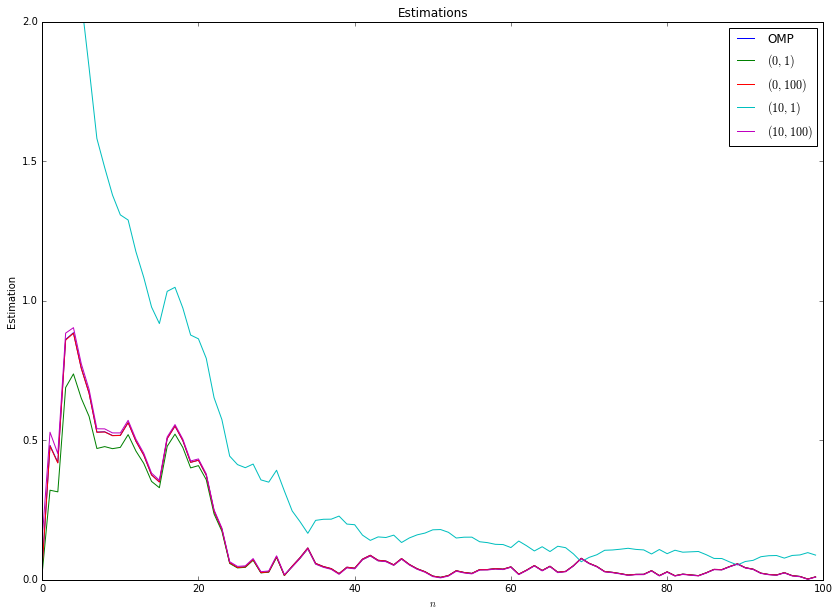

In [7]:
plt.figure(figsize=(14, 10))

n = np.arange(sample.size)

plt.plot(n, np.abs(omp_a - 0), label = 'OMP')

for i in xrange(options.size/2):
    plt.plot(n, np.abs(bayesian_ests_a[i] - 0), label = '$(' + str(options[i][0]) + ', ' + str(options[i][1]) + ')$')

plt.ylim(0, 2)
plt.ylabel('Estimation')
plt.xlabel('$n$')
plt.title('Estimations')
plt.legend()

plt.show()

## Вывод

При адекватном подборе параметров априорного расперделения байесовская оценка имеет такую же точность как и ОМП, однако в ОМП нам нет необходимости угадывать эти параметры и при этом мы получаем довольно точную оценку.

## ОМП для каждого $n\leq 100$ в модели $N(0, \theta)$ параметра $\theta$

In [8]:
omp_sigma_2 = np.zeros_like(sample)
for i in xrange(omp_sigma_2.size):
    omp_sigma_2[i] = np.mean(np.power(sample[:i + 1]-0, 2))

## Байесовская оценка для каждого $n\leq 100$ в модели $N(0, \theta)$ параметра $\theta$

В качестве априорного распределения возьмем обратное к гамма распределение с параметрами $(\lambda,\alpha)$

In [9]:
def bayesian_estimation_sigma_2(sample, lamb, alpha):
    conditional_expectation = (2*alpha + np.sum(np.power(sample, 2)))/(2*lamb + sample.size - 2)
    return conditional_expectation

### $(\lambda, \alpha) \ni \{(1, 1), (1, 100), (10, 1), (10, 100)\}$

In [10]:
options_2 = np.array([(1, 1), (1, 100), (10, 1), (10, 100)])
bayesian_ests_sigma_2 = np.zeros(options_2.size*sample.size/2).reshape(options_2.size/2, sample.size)

In [11]:
for i in xrange(options_2.size/2):
    for j in xrange(sample.size):
        bayesian_ests_sigma_2[i][j] = bayesian_estimation_sigma_2(sample[:j + 1], options_2[i][0], options_2[i][1])

## График абсолютной величины отклонения оценки от истинного значения параметра в зависимости от n для оценки максимального правдоподобия и байесовских оценок

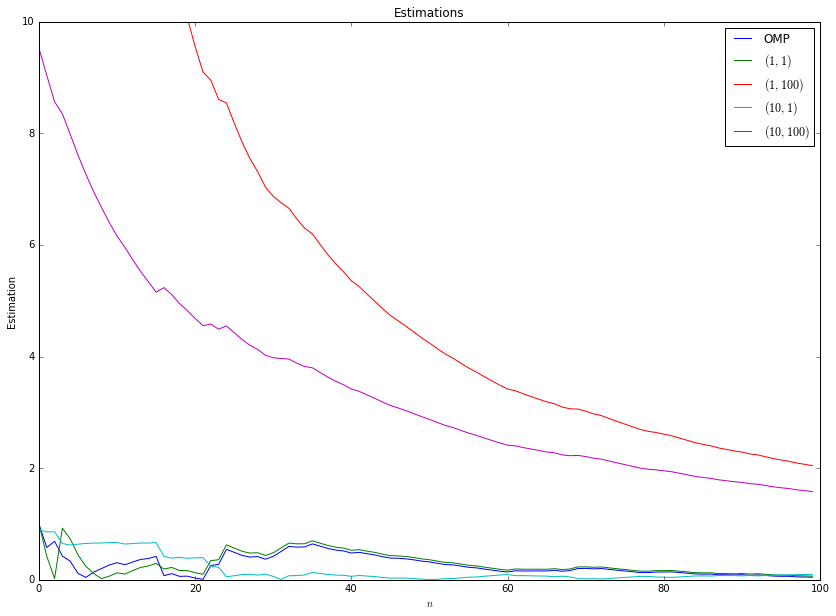

In [12]:
plt.figure(figsize=(14, 10))

n = np.arange(sample.size)

plt.plot(n, np.abs(omp_sigma_2 - 1), label = 'OMP')

for i in xrange(options_2.size/2):
    plt.plot(n, np.abs(bayesian_ests_sigma_2[i] - 1), \
             label = '$(' + str(options_2[i][0]) + ', ' + str(options_2[i][1]) + ')$')

plt.ylim(0, 10)
plt.ylabel('Estimation')
plt.xlabel('$n$')
plt.title('Estimations')
plt.legend()

plt.show()

## Вывод

При адекватном подборе параметров априорного расперделения байесовская оценка имеет такую же точность как и ОМП, однако в ОМП нам нет необходимости угадывать эти параметры и при этом мы получаем довольно точную оценку.